In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales = pd.read_csv("SalesData.csv")
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


In [3]:
sales.shape
sales.isnull().sum()

AccountId             0
AccountName           0
Region                0
Division              0
City                  0
State                 0
Tier                  0
Month                 0
Sales2015             0
Sales2016             0
Units2015             0
Units2016             0
TargetAchevied2015    0
TargetAchevied2016    0
dtype: int64

### 1. Compare Sales by region for 2016 with 2015 using bar chart

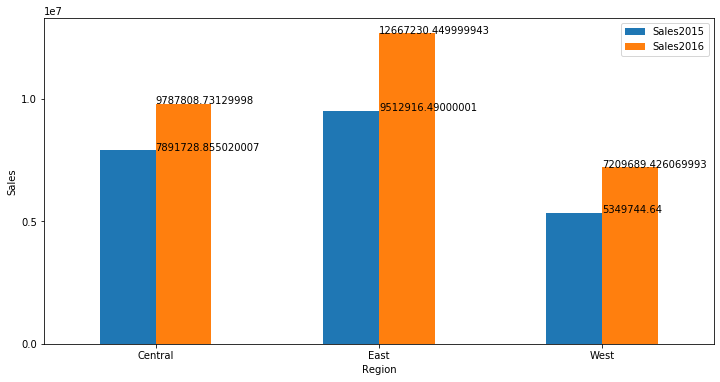

In [4]:
sales1 = sales.groupby(by = ['Region'])[["Sales2015","Sales2016"]].sum()
sales1
sales1graph=sales1.plot(kind = "bar",figsize=(12,6))
for x,y_axis in enumerate(sales1.Sales2015):
    plt.text(x=x,y=y_axis,s=str(y_axis))
for x,y_axis in enumerate(sales1.Sales2016):
    plt.text(x=x,y=y_axis,s=str(y_axis))   
plt.ylabel("Sales")
plt.yticks(np.arange(0,15000000,5000000))
plt.xticks(rotation = 0)
plt.show()

In [5]:
sales1

,Sales2015,Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

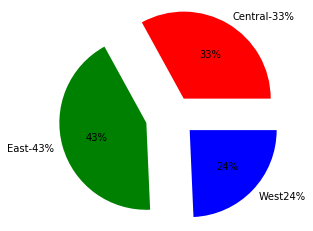

In [54]:
sales2 = sales.groupby(by =['Region'])[["Sales2016"]].sum()

sales2.plot(kind='pie', 
           labels=["Central-33%","East-43%","West24%"], 
            colors=['r', 'g', 'b'],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10, 
            subplots='true',
            legend = False,
            explode = [0.22,0.33,0.25],
           )
plt.ylabel("")
plt.show()

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [ ]:
sales3 = sales.groupby([]).aggregate({})

sales3graph=sales3.plot.bar(figsize=(18,6))

In [7]:
sales3 = sales.groupby(by = ["Region","Tier"])[["Sales2015","Sales2016"]].sum()
sales4 = sales3.pivot_table(index= ["Tier"],columns="Region",values=["Sales2015","Sales2016"])

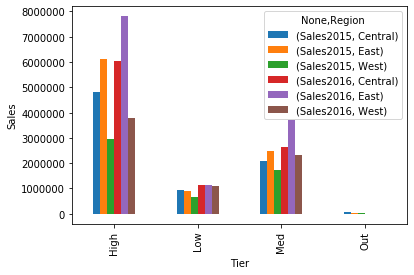

In [27]:
sales4.plot(kind = "bar")
plt.ylabel("Sales")
plt.xlabel("Tier")
plt.show()

### 4. In East region, which state registered a decline in 2016 as compared to 2015?
  - In East region NY registered a decline in 2016
 

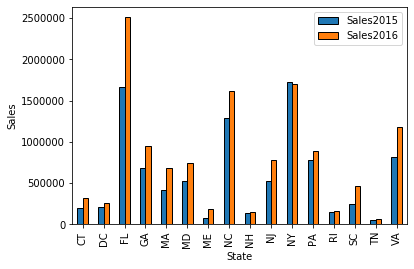

In [30]:
sales.head(2)
East = sales.loc[sales.Region=="East"]
EastGraph = East.groupby(by="State")[["Sales2015","Sales2016"]].sum()
EastGraph.plot(kind = "bar",edgecolor = "black")
plt.ylabel("Sales")
plt.xlabel("State")
plt.show()

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?
 - There is no divison which saw a decline in unit sold in 2016

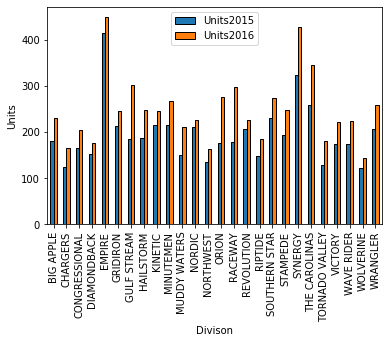

In [29]:
sales.head(2)
Tier = sales.loc[sales.Tier=="High"]
TierDivison = Tier.groupby(by = "Division")[["Units2015","Units2016"]].sum()
TierDivison.plot(kind = "bar",edgecolor = "black")
plt.ylabel("Units")
plt.xlabel("Divison")
plt.show()

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [39]:
sales = sales.assign(Qtr = np.where(sales.Month=="Jan","Q1",
                                    (np.where(sales.Month=="Feb","Q1",
                                              (np.where(sales.Month=="Mar","Q1",
                                                       (np.where(sales.Month=="Apr","Q2",
                                                                (np.where(sales.Month=="May","Q2",
                                                                         (np.where(sales.Month=="Jun","Q2",
                                                                                  (np.where(sales.Month=="Jul","Q3",
                                                                                           (np.where(sales.Month=="Aug","Q3",
                                                                                                    (np.where(sales.Month=="Sep","Q3",
                                                                                                             (np.where(sales.Month=="Oct","Q4",
                                                                                                                      (np.where(sales.Month=="Nov","Q4","Q4"))))))))))))))))))))))

In [43]:
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


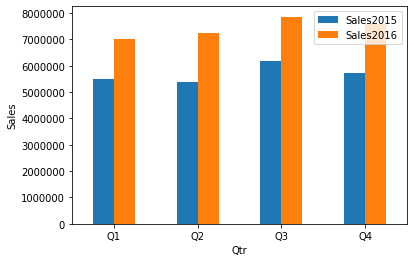

In [49]:
QtrSales = sales.groupby(by="Qtr")[["Sales2015","Sales2016"]].sum()
QtrSales.plot(kind = "bar")
plt.xlabel("Qtr")
plt.ylabel("Sales")
plt.xticks(rotation = 0)
plt.show()

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [64]:
sales8 = sales[sales['Tier']!='Out']
sales8 = sales8.groupby(by = ["Qtr","Tier"])[["Sales2016"]].sum()
sales8 = sales8.round(decimals=0)
sales8 = sales8.stack() # long to wide data
sales8 = sales8.unstack(level=0)
sales8

,Qtr,Q1,Q2,Q3,Q4
Tier,,,,,
High,Sales2016,3867719.0,4130953.0,4872559.0,4740002.0
Low,Sales2016,948833.0,890595.0,795178.0,742659.0
Med,Sales2016,2181402.0,2215814.0,2197058.0,2085207.0


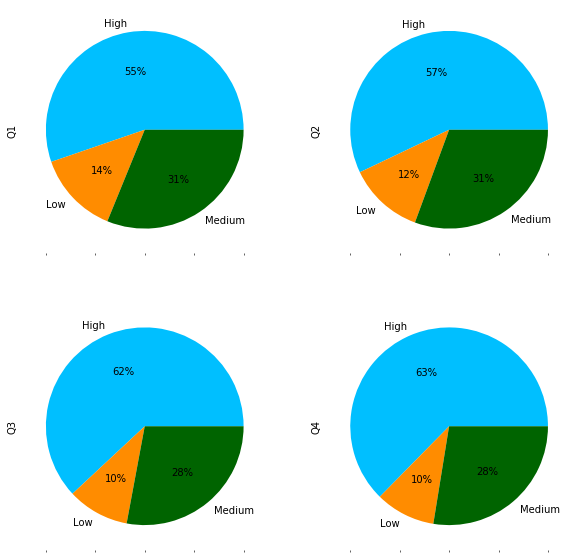

In [66]:
sales8.plot(kind='pie', 
            labels=['High', 'Low', 'Medium'], 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            autopct='%1.0f%%',
            fontsize=10,
            subplots='true',
            layout=(2,2), #to get a grid
            figsize=(10,10),
           legend = False)
plt.show()